# Automated Classification of Breast Cancer Patients via Supervised Machine Learning Algorithms

#### Peter Sondergaard, SVP, Gartner Research 
> Information is the oil of the 21st century, and analytics is the combustion engine.

Begin by imported relevant libraries and data sheets.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

We will be using Numpy for High Performance Mathematical Computations, Pandas for Data Analytics and Management, Matplotlib and Seaborn as a plotting interface for generating readable graphs.

In [3]:
clinicalData = pd.read_csv('C:\\Users\\Aniket Pant\\Documents\\GitHub\\Machine-Learning\\Breast Cancer Proteomes\\breastcancerproteomes\\clinical_data_breast_cancer.csv')
pam50proteinData = pd.read_csv("C:\\Users\\Aniket Pant\\Documents\\GitHub\\Machine-Learning\\Breast Cancer Proteomes\\breastcancerproteomes\\PAM50_proteins.csv")
cancerProteomeData = pd.read_csv("C:\\Users\\Aniket Pant\\Documents\\GitHub\\Machine-Learning\\Breast Cancer Proteomes\\breastcancerproteomes\\77_cancer_proteomes_CPTAC_itraq.csv")

### Checking how Data is laid out in all three datasets allows us to better assess how to wrangle it.

In [4]:
pam50proteinData.head()

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160


In [5]:
cancerProteomeData.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


Observe mostly binary classification features in Clinical Data

In [6]:
clinicalData.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [7]:
pam50proteinData.isnull().sum()

GeneSymbol         0
RefSeqProteinID    0
Species            0
Gene Name          0
dtype: int64

Pam50 has no NaN values

In [8]:
cancerProteomeData.isnull().sum

<bound method DataFrame.sum of        RefSeq_accession_number  gene_symbol  gene_name  AO-A12D.01TCGA  \
0                        False        False      False           False   
1                        False         True      False           False   
2                        False        False      False           False   
3                        False         True      False           False   
4                        False         True      False           False   
5                        False        False      False           False   
6                        False        False      False           False   
7                        False         True      False           False   
8                        False         True      False           False   
9                        False        False      False           False   
10                       False        False      False           False   
11                       False        False      False           False   
12     

Our Proteomic Dataset includes many NaN values, so we must be careful if we plan to use it for feature engineering or classifications.

In [9]:
clinicalData.isnull().sum()
clinicalData.describe()

,Age at Initial Pathologic Diagnosis,Days to Date of Last Contact,Days to date of Death,OS event,OS Time,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
count,105.000000,105.000000,11.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,58.685714,788.390476,1254.454545,0.104762,817.647619,-4.885714,-7.180952,4.000000,3.342857,2.590476,2.742857,1.980952,2.352381
std,13.066630,645.283040,678.050642,0.307715,672.026613,3.558074,5.022605,1.593255,1.406226,1.342323,1.074428,0.970537,1.091761
min,30.000000,0.000000,160.000000,0.000000,0.000000,-12.000000,-13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,49.000000,240.000000,947.500000,0.000000,240.000000,-6.000000,-12.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,58.000000,643.000000,1364.000000,0.000000,665.000000,-5.000000,-6.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000
75%,67.000000,1288.000000,1627.500000,0.000000,1305.000000,-3.000000,-2.000000,5.000000,4.000000,3.000000,4.000000,3.000000,3.000000
max,88.000000,2850.000000,2483.000000,1.000000,2850.000000,0.000000,0.000000,7.000000,5.000000,5.000000,4.000000,4.000000,5.000000


Here we see that our Clinical data supplied by iTRAQ has no NaN values, excluding the "Days to date of Death" feature, which can be extrapolated or dropped completely.

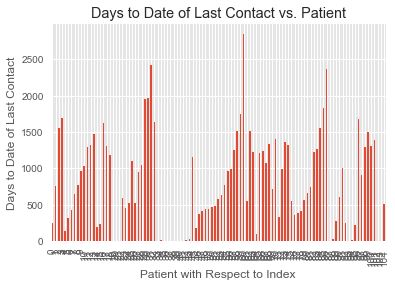

In [10]:
clinicalData['Days to Date of Last Contact'].plot(kind='bar')
plt.xlabel('Patient with Respect to Index')
plt.ylabel("Days to Date of Last Contact")
plt.title('Days to Date of Last Contact vs. Patient')

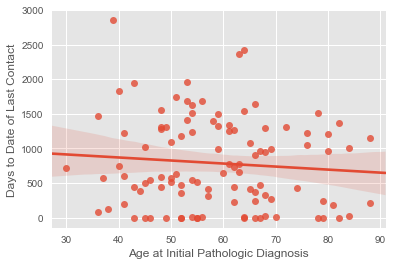

In [11]:
sns.regplot(clinicalData['Age at Initial Pathologic Diagnosis'], clinicalData['Days to Date of Last Contact'])

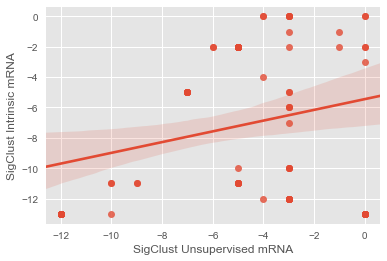

In [12]:
sns.regplot(clinicalData['SigClust Unsupervised mRNA'], clinicalData['SigClust Intrinsic mRNA'])

Correlation between Different Cancer Types

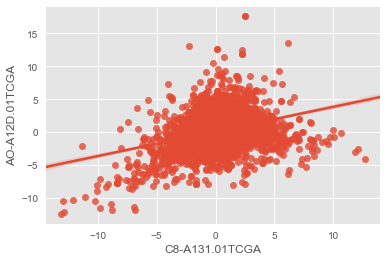

In [13]:
# sns.barplot(x="gene_name", y="AO-A12D.01TCGA", data=cancerProteomeData)
sns.regplot(cancerProteomeData['C8-A131.01TCGA'], cancerProteomeData['AO-A12D.01TCGA'])

Correlation between Healthy Patient and Cancerous Patient

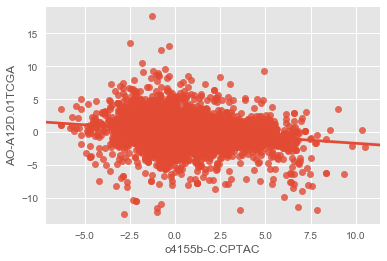

In [14]:
sns.regplot(cancerProteomeData['c4155b-C.CPTAC'], cancerProteomeData['AO-A12D.01TCGA'])